In [ ]:
# Conectar drive con colab para leer archivos desde nuestro Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar la librería Pandas la que nos permite leer archivos de datos y
# crear un data frame

import pandas as pd

In [ ]:
# Usamos la función de pandas .read_csv() y el resultado se lo asignamos a una variable
# Como argumento de .read_csv() usamos la ruta del archivo a leer.
# Esto es una de las maneras en que podemos crear un DataFrame


df_pss = pd.read_csv('./drive/MyDrive/Colab Notebooks/presion_sanguinea_sistolica.csv')
df_pss

,Nro,Edad,PSS
0,1,44,142
1,2,46,142
2,3,42,138
3,4,57,168
4,5,21,120
...,...,...,...
64,65,47,156
65,66,68,172
66,67,56,165
67,68,36,124


In [ ]:
# Nos permite conocer estadísticas de nuestros datos

df_pss.describe()

,Nro,Edad,PSS
count,69.000000,69.000000,69.000000
mean,35.000000,46.507246,148.724638
std,20.062403,14.584060,18.475647
min,1.000000,17.000000,110.000000
25%,18.000000,38.000000,135.000000
50%,35.000000,47.000000,149.000000
75%,52.000000,59.000000,162.000000
max,69.000000,70.000000,185.000000


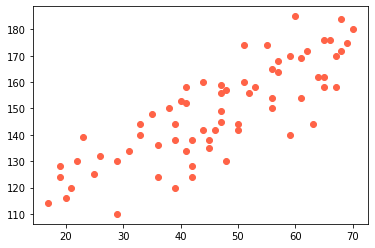

In [ ]:
# Importar módulo matlplotlib
from matplotlib import pyplot as plt


# Leemos los datos accediendo a la columna correspondiente
# Usamos la notación de listas nombre_de_la_lista['Nombre_Columna']

x = df_pss['Edad']
y = df_pss['PSS']

# Graficamos el diagrama de dispersión

plt.scatter(x, y, color='tomato')

plt.show()

## **Regresión Lineal Simple**

La regresión lineal simple consiste en generar un modelo de regresión (ecuación de una recta) que permita explicar la relación lineal que existe entre dos variables. A la variable dependiente o respuesta se le identifica como Y y a la variable predictora o independiente como X.

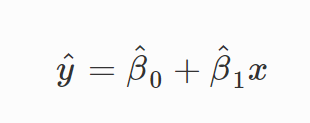

Correlación lineal

Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación.

Para ello calculamos el coeficiente de Correlación R de Pearson, el cual nos explica cuanta relación tienen ambas variables.

Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

Se emplean como medida de fuerza de asociación (tamaño del efecto):

*   0: asociación nula.
*   0.1: asociación pequeña.
*   0.3: asociación mediana.
*   0.5: asociación moderada.
*   0.7: asociación alta.
*   0.9: asociación muy alta.



In [ ]:
# Importamos la librería numpy

import numpy as np

# Usaremos el método round() para redondear los resultados
# Sintaxis: round(valor_a_redondear, cantidad de decimales)

# Calculamos los promedios
promedio_x = round(x.mean(), 2)
promedio_y = round(y.mean(), 2)

# Calculamos la desviación estándar
desv_std_x = round(np.std(x), 2)
desv_std_y = round(np.std(y), 2)

# Calculamos la varianza
var_x = round(np.cov(x, y)[0][0], 2)

# Calculamos la covarianza
cov_x_y = round(np.cov(x, y)[0][1], 2)

# Mostramos los resultados

print(promedio_x)
print(promedio_y)
print(desv_std_x)
print(desv_std_y)
print(var_x)
print(cov_x_y)

# Calculamos el coeficiente de Correlación R de Pearson

rPearson = round( cov_x_y/(desv_std_x * desv_std_y), 2)

print("El coeficiente de correlación R de Person es: ", rPearson)

# Calculamos el estimador Beta 1 (pendiente)

beta_1 = round((cov_x_y/var_x), 2)

# Calculamos el estimador Beta 0 (intercepto)

beta_0 = round((promedio_y-beta_1*promedio_x), 2)

print(beta_1, beta_0)


46.51
148.72
14.48
18.34
212.69
220.95
El coeficiente de correlación R de Person es:  0.83
1.04 100.35


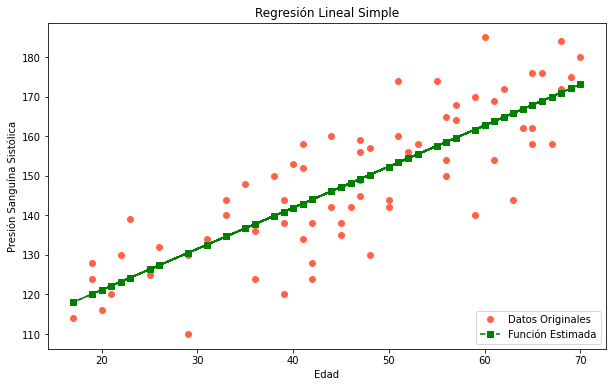

In [ ]:
# Crear el gráfico de con la función estimada a través de la Regresión Lineal
from matplotlib import pyplot as plt

# Tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de los datos originales

x = df_pss['Edad']
y = df_pss['PSS']

plt.plot(x, y, marker='o', linestyle='', color='tomato', label='Datos Originales')

# Gráfico de Función estimada
x2 = df_pss['Edad']

y2=[]
for i,e in enumerate(x):
  value = beta_0 + beta_1 * x2[i]
  y2.append(value)

plt.plot(x2, y2, marker='s', linestyle='--', color='g', label='Función Estimada')
plt.xlabel('Edad')
plt.ylabel('Presión Sanguína Sistólica')
plt.title('Regresión Lineal Simple')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Realizar una estimación de la función que relaciona los datos usando la Regresión Lineal
# Responder el ticket de salida de acuerdo al R de Pearson calculado.

equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
             "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
             "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
             "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
             "Atlanta","Washington","San.F","San.I","Seattle"]
numero_bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
                   5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
                   5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]
runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
          667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
          593, 556]
dict_equipos = {'Equipos':equipos, 'Numero Bateos':numero_bateos, 'Runs':runs}
df_equipos = pd.DataFrame(dict_equipos)
df_equipos


,Equipos,Numero Bateos,Runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867
7,Milwaukee,5447,721
8,Colorado,5544,735
9,Houston,5598,615


In [ ]:
# Desafío

# Analizar mediante una regresión si existe alguna relación
# Entre el puntaje de los estudiantes en Reading Score y Writing Score